In [14]:
!if [ ! -f ./data/Country-data.csv ]; \
then \
curl -L -o unsupervised-learning-on-country-data.zip https://www.kaggle.com/api/v1/datasets/download/rohan0301/unsupervised-learning-on-country-data; \
unzip unsupervised-learning-on-country-data.zip; \
rm unsupervised-learning-on-country-data.zip; \
mv ./Country-data.csv ./data/Country-data.csv; \
mv ./data-dictionary.csv ./data/data-dictionary.csv; \
fi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5340  100  5340    0     0   6387      0 --:--:-- --:--:-- --:--:--  6387
Archive:  unsupervised-learning-on-country-data.zip
  inflating: Country-data.csv        
  inflating: data-dictionary.csv     


In [17]:
# Importa le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carica i dataset
data = pd.read_csv('./data/Country-data.csv')
data_dict = pd.read_csv('./data/data-dictionary.csv')

# Visualizza le prime righe del dataset
print("Prime righe del dataset:")
display(data.head())

# Visualizza il dizionario dati
print("\nDizionario dati:")
display(data_dict)

Prime righe del dataset:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200



Dizionario dati:


,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [21]:
# Informazioni generali sul dataset
print("\nInformazioni sul dataset:")
data.info()

# Statistiche descrittive
print("\nStatistiche descrittive:")
display(data.describe())

# Controlla valori nulli o mancanti
print("\nValori nulli nel dataset:")
print(data.isnull().sum())


Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB

Statistiche descrittive:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000



Valori nulli nel dataset:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64



Distribuzione delle variabili numeriche:


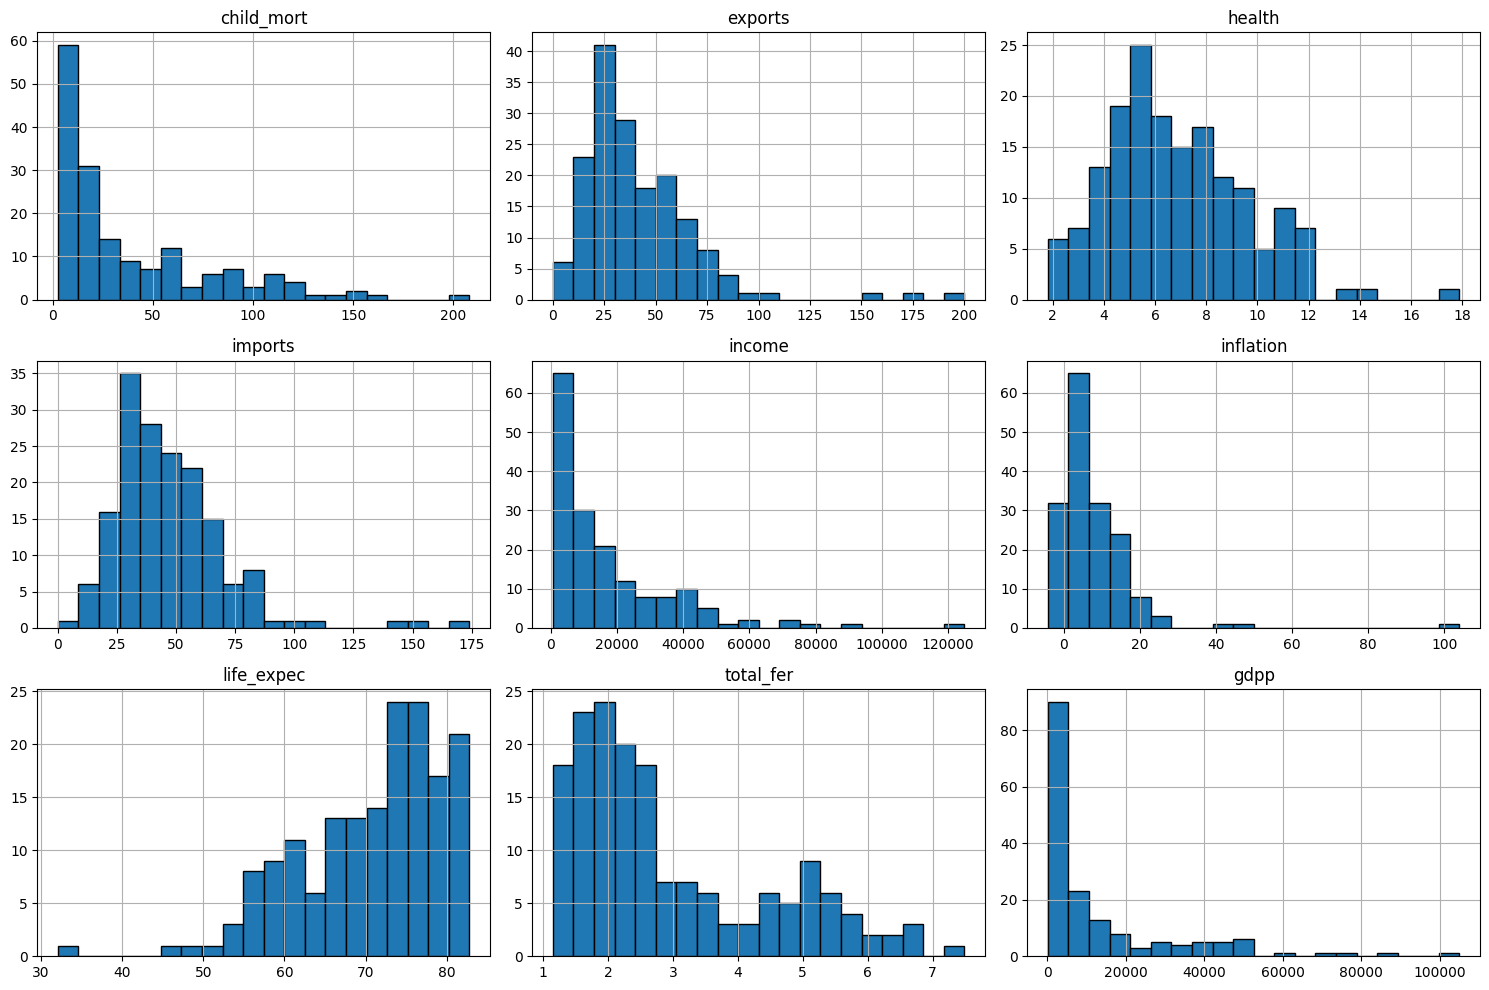


Matrice di correlazione:


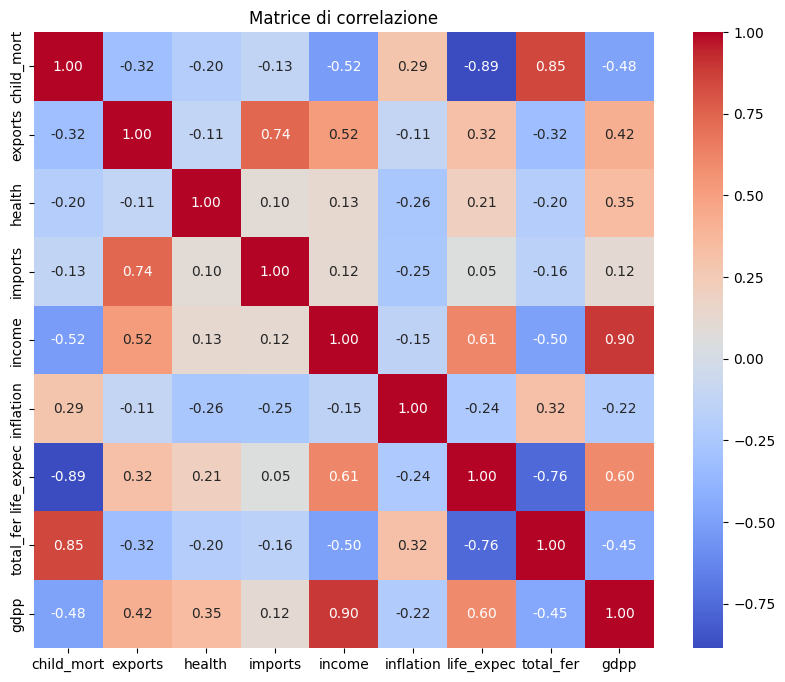


Boxplot delle variabili numeriche:


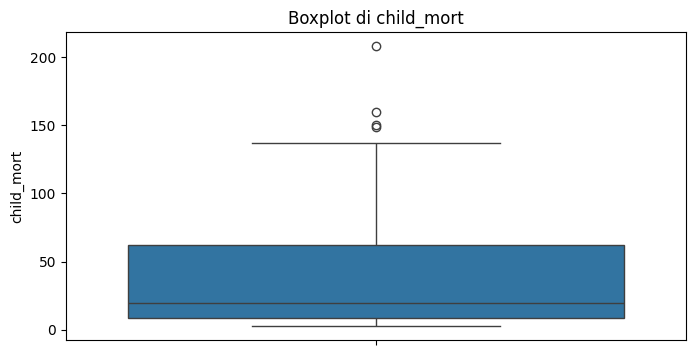

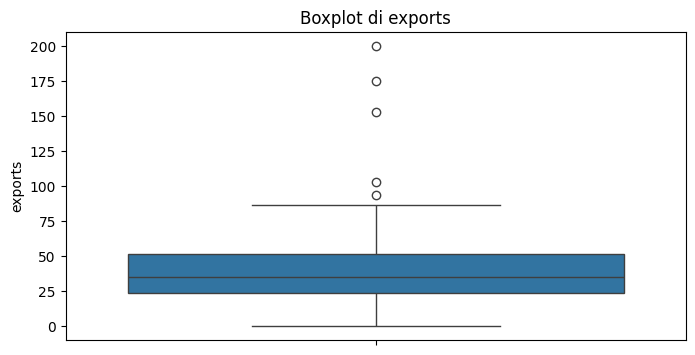

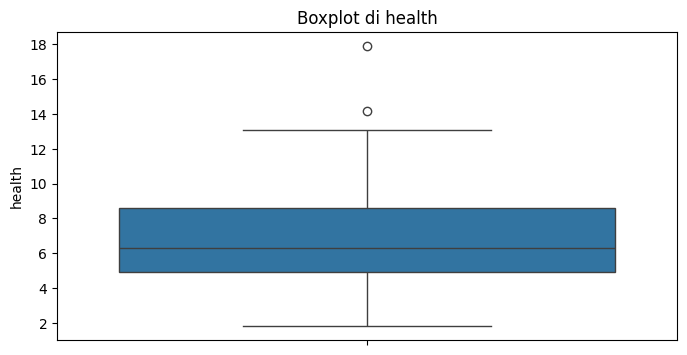

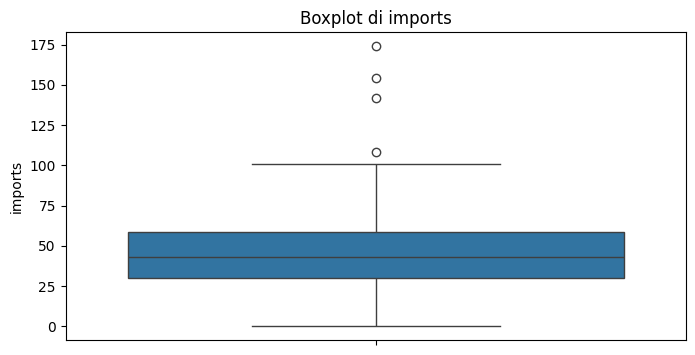

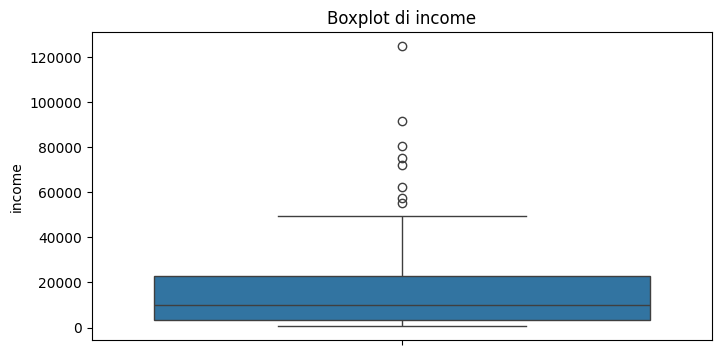

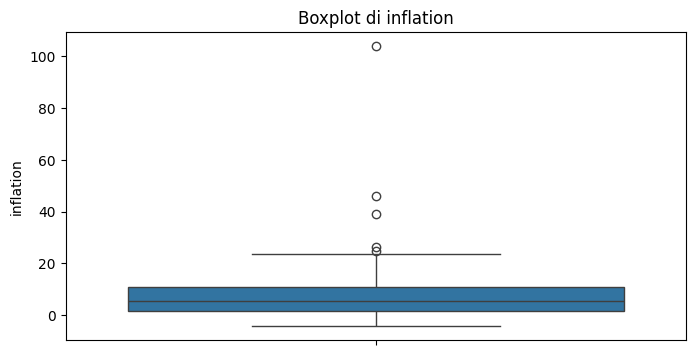

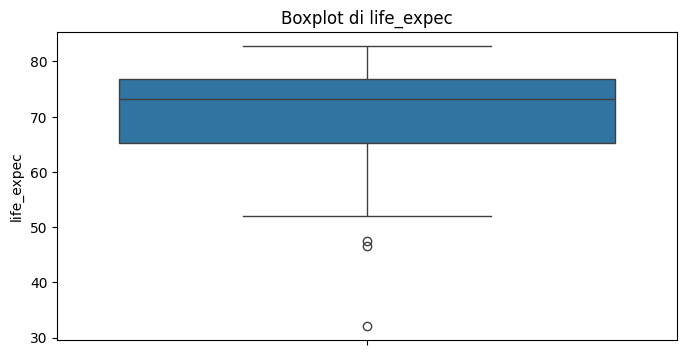

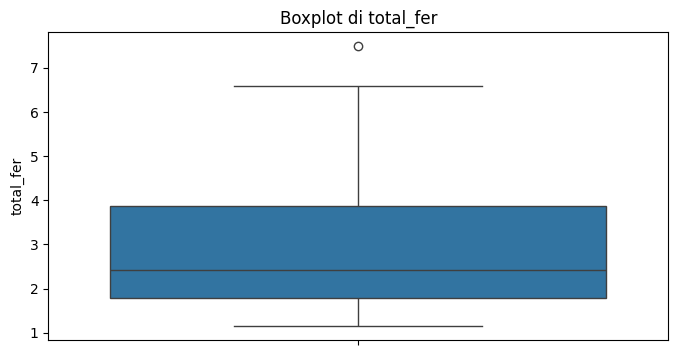

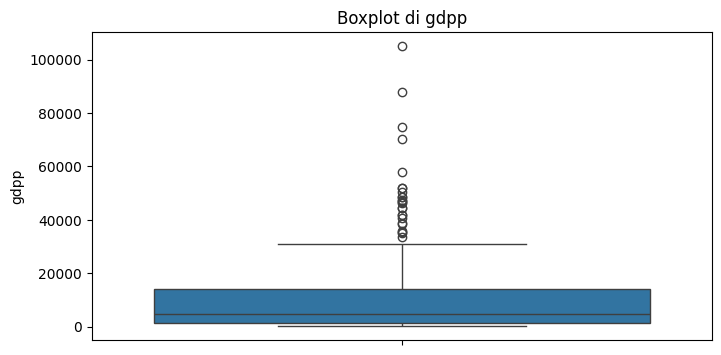


Valori unici per le variabili categoriche:
country: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Repu

In [22]:
# Distribuzione dei valori numerici
print("\nDistribuzione delle variabili numeriche:")
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

# Matrice di correlazione
print("\nMatrice di correlazione:")
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione')
plt.show()

# Boxplot per rilevare outlier
print("\nBoxplot delle variabili numeriche:")
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot di {col}')
    plt.show()

# Controlla i valori univoci per le variabili categoriche
print("\nValori unici per le variabili categoriche:")
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].unique()}")

In [27]:
X = np.array(
    [[1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]]
)

centroids = np.array(
    [[1, 2, 3],
    [7, 8, 9]],
)

np.linalg.norm(X[:3] - centroids[0])
np.linalg.norm(X[:3] - centroids[0], axis=1)

array([ 0.        ,  5.19615242, 10.39230485])

In [20]:
X[:2] - centroids[0]

array([[0, 0, 0],
       [3, 3, 3]])

In [11]:
centroids.reshape(2, 1, 3)

array([[[1, 2, 3]],

       [[7, 8, 9]]])

In [12]:
X - centroids.reshape(2, 1, 3)

array([[[ 0,  0,  0],
        [ 3,  3,  3],
        [ 6,  6,  6],
        [ 9,  9,  9]],

       [[-6, -6, -6],
        [-3, -3, -3],
        [ 0,  0,  0],
        [ 3,  3,  3]]])

In [47]:
prob = np.linalg.norm(X - centroids.reshape(2, 1, 3), axis=2).min(axis=0) 
prob /= np.linalg.norm(X - centroids.reshape(2, 1, 3), axis=2).min(axis=0).sum(axis=0)

In [59]:
np.append(prob, 1)

array([0. , 0.5, 0. , 0.5, 1. ])

In [54]:
np.random.choice(len(X), p=prob)

1

In [80]:
def _kmeanspp_init(X, n_clusters):
    """
    Utilizza K-Means++ per inizializzare i centroidi.

    Args:
        X (numpy.ndarray): Dataset di input di forma (n_samples, n_features).

    Returns:
        numpy.ndarray: Centroidi iniziali.
    """
    n_samples, n_features = X.shape

    # Scelgo il primo centroide casualmente
    centroids = [X[np.random.randint(n_samples)]]

    print("Centroide iniziale:", centroids[0])

    for _ in range(1, n_clusters):
        # Calcolo la distanza minima al quadrato per ogni punto rispetto ai centroidi già scelti
        distances = np.min([np.linalg.norm(X - c, axis=1) for c in centroids], axis=0)

        print("Array delle distanze (minime):", distances)
        # Calcolo le probabilità proporzionali alle distanze
        probabilities = distances / distances.sum()

        print("Array delle probabilità:", probabilities)

        # Scelgo un nuovo centroide in base alle probabilità
        new_centroid = X[np.random.choice(n_samples, p=probabilities)]
        centroids.append(new_centroid)

        print("Centroidi:", centroids)

    return np.array(centroids)

In [81]:
X

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [82]:
centroids = _kmeanspp_init(X, 2)

Centroide iniziale: [4 5 6]
Array delle distanze (minime): [ 5.19615242  0.          5.19615242 10.39230485]
Array delle probabilità: [0.25 0.   0.25 0.5 ]
Centroidi: [array([4, 5, 6]), array([10, 11, 12])]


In [85]:
distances = [np.linalg.norm(X - c, axis=1) for c in centroids]
distances

[array([ 5.19615242,  0.        ,  5.19615242, 10.39230485]),
 array([15.58845727, 10.39230485,  5.19615242,  0.        ])]

In [86]:
np.argmin([np.linalg.norm(X - c, axis=1) for c in centroids], axis=0)

array([0, 0, 0, 1])

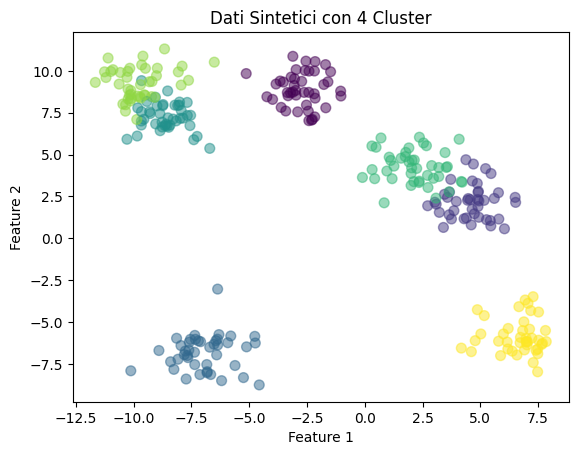

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generazione di dati sintetici
X, y_true = make_blobs(n_samples=300, centers=7, cluster_std=1.0, random_state=42)

# Plot dei dati originali per avere un'idea
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.5)
plt.title("Dati Sintetici con 4 Cluster")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

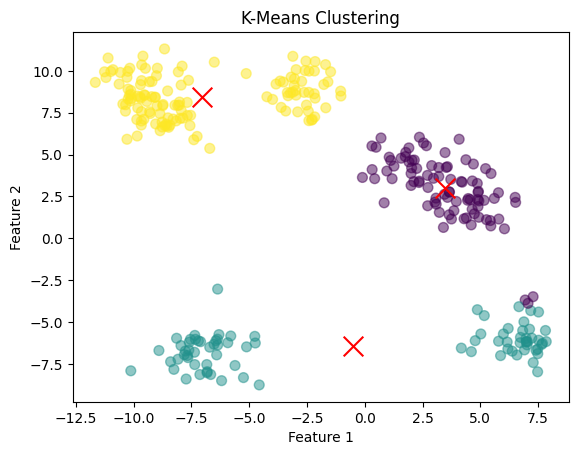

In [10]:
from kmeans import KMeans

model = KMeans(n_clusters=3, max_iter=300, tol=1e-4, kmeanspp=True, random_state=42)
model.fit(X)
model.plot_clusters(X)

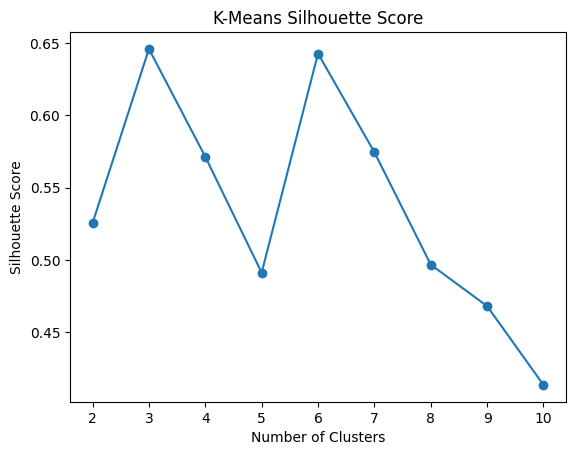

In [11]:
model.plot_silhouette_score(X)

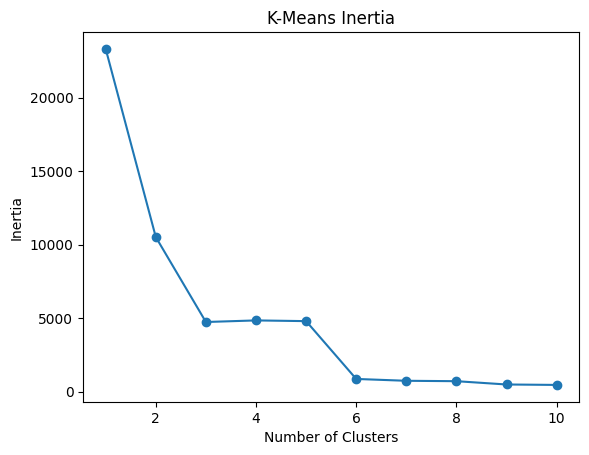

In [12]:
model.plot_elbow(X)

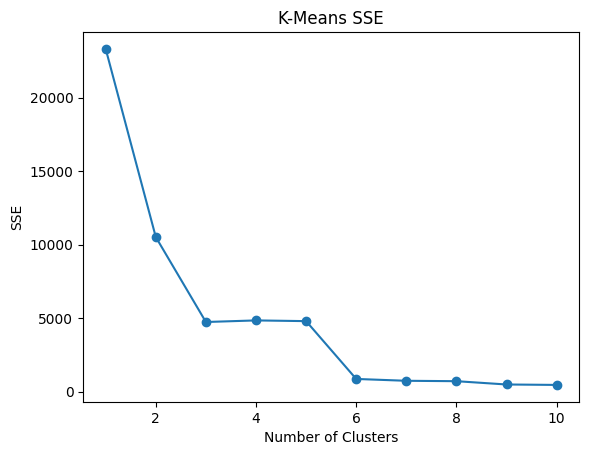

In [13]:
model.plot_sse(X)

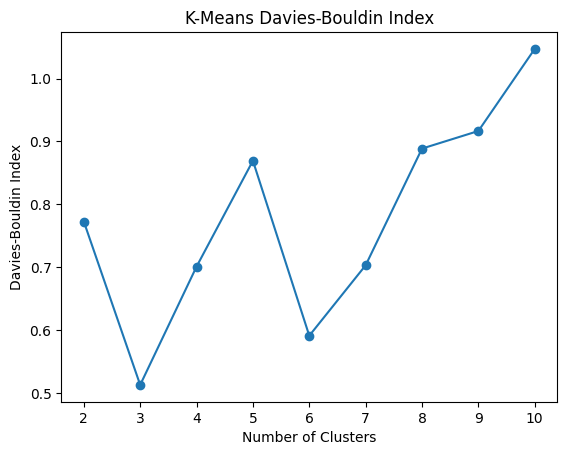

In [14]:
model.plot_dbi(X)

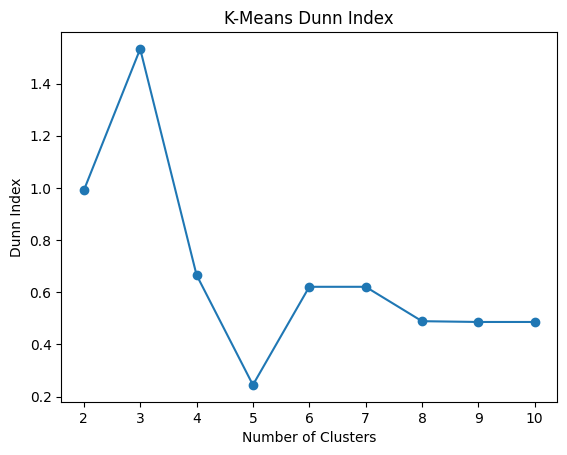

In [15]:
model.plot_dunn_index(X)